In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, x_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000, 28, 28))

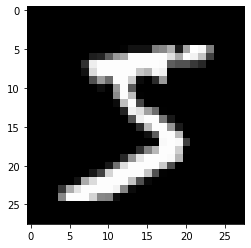

In [4]:
plt.imshow(x_train[0,:,:], cmap='gray', vmin=0, vmax=255)

In [5]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [6]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [7]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
model = Sequential()
model.add(Dense(512, input_dim=28*28))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),              
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [10]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2243 - categorical_accuracy: 0.9320
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0981 - categorical_accuracy: 0.9692
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0751 - categorical_accuracy: 0.9762
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0602 - categorical_accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0501 - categorical_accuracy: 0.9841


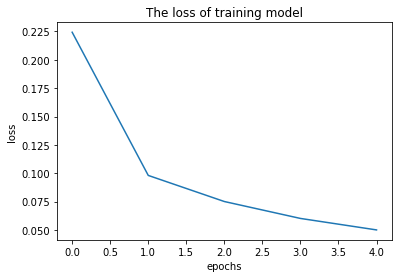

In [11]:
plt.plot(history.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

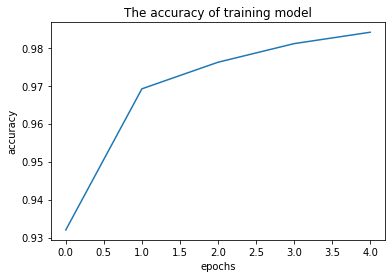

In [12]:
plt.plot(history.history['categorical_accuracy'])
plt.title('The accuracy of training model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [13]:
score = model.evaluate(x_test, y_test)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - categorical_accuracy: 0.9778
Test Loss:  0.07391686737537384
Test Accuracy:  0.9778000116348267
